In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"

In [4]:
df = pd.read_csv(url)
print("Shape:", df.shape)
df.head()

Shape: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

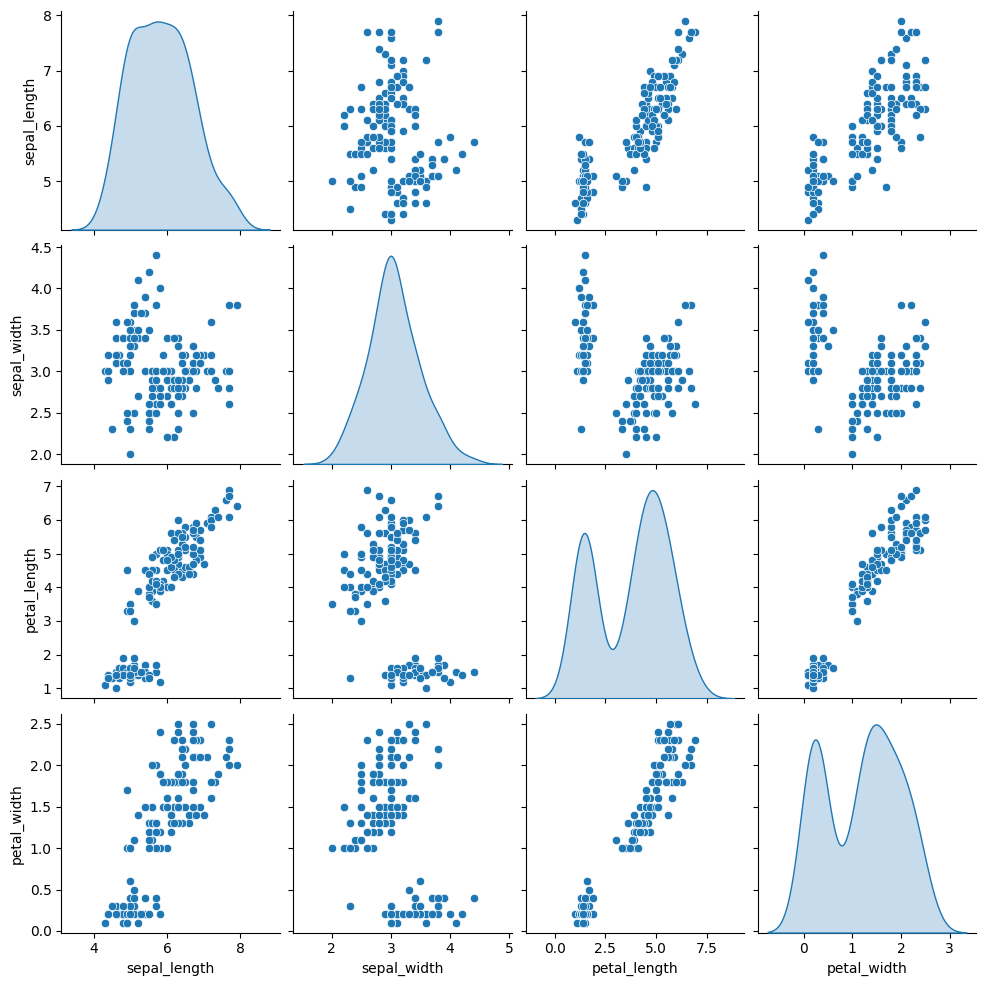

In [6]:
sns.pairplot(df, diag_kind="kde")
plt.show()

In [7]:
X = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Feature Shape:", X_scaled.shape)

Scaled Feature Shape: (150, 4)


In [8]:
inertia = []
K = range(1,11)

In [9]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

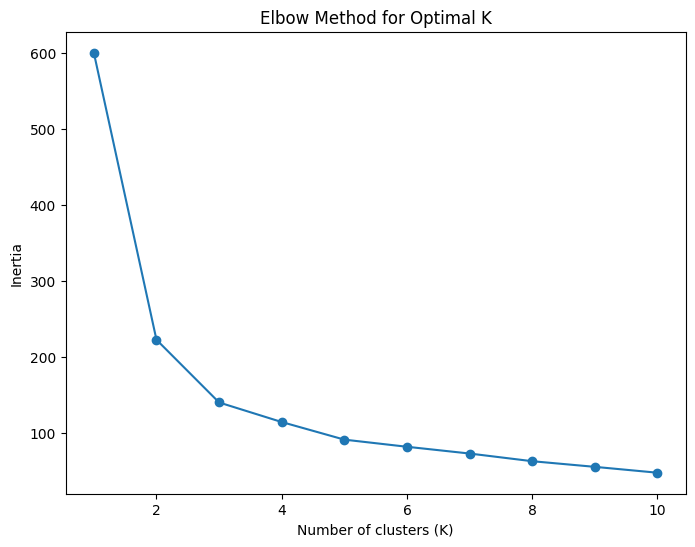

In [10]:
plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = labels
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

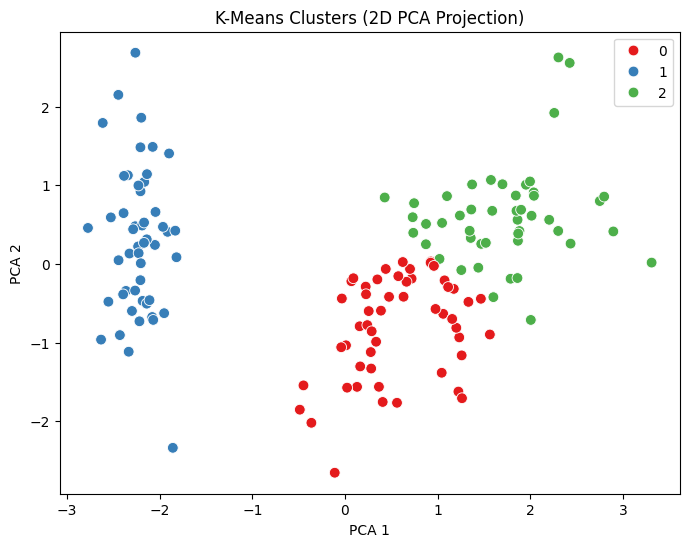

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="Set1", s=60)
plt.title("K-Means Clusters (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [15]:
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.45994823920518646


In [16]:
cluster_summary = df.groupby("Cluster").mean()
print(cluster_summary)

TypeError: agg function failed [how->mean,dtype->object]

In [17]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby("Cluster")[numeric_cols].mean()

print(cluster_summary)

         sepal_length  sepal_width  petal_length  petal_width  Cluster
Cluster                                                               
0            5.801887     2.673585      4.369811     1.413208      0.0
1            5.006000     3.428000      1.462000     0.246000      1.0
2            6.780851     3.095745      5.510638     1.972340      2.0


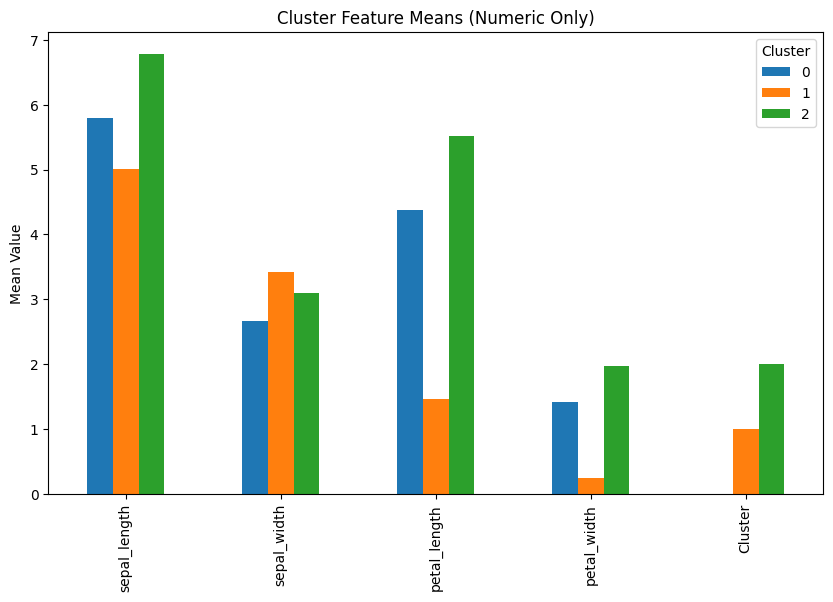

In [18]:
cluster_summary.T.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Feature Means (Numeric Only)")
plt.ylabel("Mean Value")
plt.show()

In [19]:
print("\nSome Observations:")
print("1. K-Means groups data by minimizing within-cluster variance (inertia).")
print("2. Elbow method helps choose the right K.")
print("3. Silhouette Score measures how well clusters are separated.")
print("4. PCA is used for visualization (reduces to 2D).")
print("5. Initialization of centroids can affect final results → use multiple n_init.")


Some Observations:
1. K-Means groups data by minimizing within-cluster variance (inertia).
2. Elbow method helps choose the right K.
3. Silhouette Score measures how well clusters are separated.
4. PCA is used for visualization (reduces to 2D).
5. Initialization of centroids can affect final results → use multiple n_init.
